# Differentation of Blackbox Combinatorial Solvers Datasets

Here we provide easy inspection of the datasets used in the paper.


## Utility Functions

In [1]:
# helper functions, you need to install tqdm for progress bar feature
import urllib.request
import numpy as np
from matplotlib import pyplot as plt

try:

    from tqdm import tqdm
    class DownloadProgressBatspr(tqdm):
        def update_to(self, b=1, bsize=1, tsize=None):
            if tsize is not None:
                self.total = tsize
            self.update(b * bsize - self.n)


    def download_url(url, output_path):
        with DownloadProgressBar(unit='B', unit_scale=True,
                                miniters=1, desc=url.split('/')[-1]) as t:
            urllib.request.urlretrieve(url, filename=output_path, reporthook=t.update_to)
except ModuleNotFoundError as e:
    def download_url(url, output_path):
        urllib.request.urlretrieve(url, filename=output_path)


# Warcraft Shortest Path

Downloading the dataset

In [30]:
# import tarfile
# import urllib.request

# os.makedirs("datasets", exist_ok=True)
# warcraft_url = "https://edmond.mpdl.mpg.de/imeji/exportServlet?format=file&id=http://edmond.mpdl.mpg.de/imeji/item/PPjoEvUh9_PVTPSD"
# data_path = "datasets/warcraft.tar.gz"
# if not os.path.exists(data_path):
#     print("Downloading dataset...")
#     download_url(warcraft_url, data_path)

# print(f"Extracting {data_path} ...")
# f = tarfile.open(data_path, "r:gz")
# f.extractall(path="datasets")
# f.close()
# print("Extracted")



Extracting datasets/warcraft.tar.gz ...
Extracted


For the Warcraft Sortest Path dataset we have randomly genrated maps of different sizes with optimal shortest path from the top left vertex to the bottom right vertex. Each type of tile has a different cost, we also supply the costs used to generate the optimal shortest paths.

Train images shape:  (10000, 96, 96, 3)
Train labels shape:  (10000, 12, 12)
Weights shape: (10000, 12, 12)


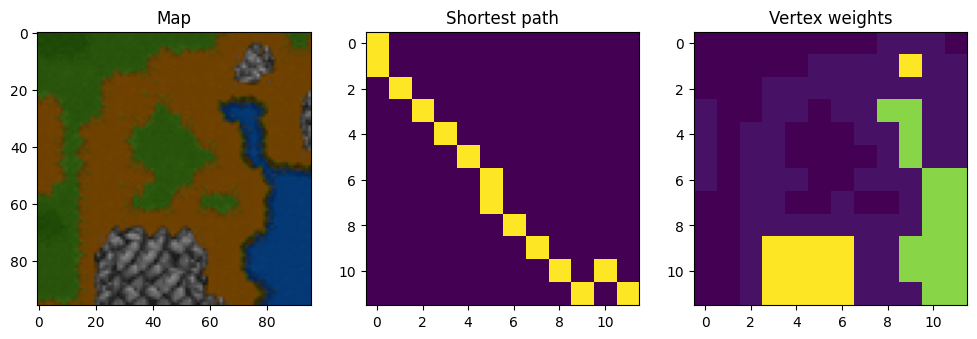

In [5]:
import os

data_dir = './../data/warcraft_shortest_path_oneskin/12x12/'

data_suffix = "maps"
train_prefix = "train"


train_inputs = np.load(os.path.join(data_dir, train_prefix + "_" + data_suffix + ".npy"))
train_weights = np.load(os.path.join(data_dir, train_prefix + "_vertex_weights.npy"))
train_labels = np.load(os.path.join(data_dir, train_prefix + "_shortest_paths.npy"))

#images = train_inputs.transpose(0,2,3,1).astype(np.uint8)
images = train_inputs

print("Train images shape: ", train_inputs.shape)
print("Train labels shape: ",  train_labels.shape)
print("Weights shape:", train_weights.shape)

idx = 0
im = images[idx]
label = train_labels[idx]
weights = train_weights[idx]


fig, ax = plt.subplots(1,3, figsize=(12,12))

ax[0].imshow(im.astype(np.uint8))
ax[0].set_title("Map")
ax[1].imshow(label)
ax[1].set_title("Shortest path")
ax[2].set_title("Vertex weights")
ax[2].imshow(weights.astype(np.float32))

In [9]:
np.unique(im)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 134, 135, 136, 138, 140, 142, 146], dtype=uint8)

In [10]:
label

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=uint8)

In [11]:
weights

array([[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 1.2, 1.2, 1.2, 0.8],
       [0.8, 0.8, 0.8, 0.8, 0.8, 1.2, 1.2, 1.2, 1.2, 9.2, 1.2, 1.2],
       [0.8, 0.8, 0.8, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
       [1.2, 0.8, 0.8, 1.2, 1.2, 0.8, 1.2, 1.2, 7.7, 7.7, 1.2, 1.2],
       [1.2, 0.8, 1.2, 1.2, 0.8, 0.8, 0.8, 1.2, 1.2, 7.7, 1.2, 1.2],
       [1.2, 0.8, 1.2, 1.2, 0.8, 0.8, 0.8, 0.8, 1.2, 7.7, 1.2, 1.2],
       [1.2, 0.8, 1.2, 1.2, 1.2, 0.8, 0.8, 1.2, 1.2, 1.2, 7.7, 7.7],
       [0.8, 0.8, 1.2, 1.2, 0.8, 0.8, 1.2, 0.8, 0.8, 1.2, 7.7, 7.7],
       [0.8, 0.8, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 7.7, 7.7],
       [0.8, 0.8, 1.2, 9.2, 9.2, 9.2, 9.2, 1.2, 1.2, 7.7, 7.7, 7.7],
       [0.8, 0.8, 1.2, 9.2, 9.2, 9.2, 9.2, 1.2, 1.2, 7.7, 7.7, 7.7],
       [0.8, 0.8, 1.2, 9.2, 9.2, 9.2, 9.2, 1.2, 1.2, 1.2, 7.7, 7.7]],
      dtype=float16)

In [14]:
temp = np.array([[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 1.2, 1.2, 1.2, 0.8],
       [0.8, 0.8, 0.8, 0.8, 0.8, 1.2, 1.2, 1.2, 1.2, 9.2, 1.2, 1.2],
       [0.8, 0.8, 0.8, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
       [1.2, 0.8, 0.8, 1.2, 1.2, 0.8, 1.2, 1.2, 7.7, 7.7, 1.2, 1.2],
       [1.2, 0.8, 1.2, 1.2, 0.8, 0.8, 0.8, 1.2, 1.2, 7.7, 1.2, 1.2],
       [1.2, 0.8, 1.2, 1.2, 0.8, 0.8, 0.8, 0.8, 1.2, 7.7, 1.2, 1.2],
       [1.2, 0.8, 1.2, 1.2, 1.2, 0.8, 0.8, 1.2, 1.2, 1.2, 7.7, 7.7],
       [0.8, 0.8, 1.2, 1.2, 0.8, 0.8, 1.2, 0.8, 0.8, 1.2, 7.7, 7.7],
       [0.8, 0.8, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 7.7, 7.7],
       [0.8, 0.8, 1.2, 9.2, 9.2, 9.2, 9.2, 1.2, 1.2, 7.7, 7.7, 7.7],
       [0.8, 0.8, 1.2, 9.2, 9.2, 9.2, 9.2, 1.2, 1.2, 7.7, 7.7, 7.7],
       [0.8, 0.8, 1.2, 9.2, 9.2, 9.2, 9.2, 1.2, 1.2, 1.2, 7.7, 7.7]])

temp

array([[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 1.2, 1.2, 1.2, 0.8],
       [0.8, 0.8, 0.8, 0.8, 0.8, 1.2, 1.2, 1.2, 1.2, 9.2, 1.2, 1.2],
       [0.8, 0.8, 0.8, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
       [1.2, 0.8, 0.8, 1.2, 1.2, 0.8, 1.2, 1.2, 7.7, 7.7, 1.2, 1.2],
       [1.2, 0.8, 1.2, 1.2, 0.8, 0.8, 0.8, 1.2, 1.2, 7.7, 1.2, 1.2],
       [1.2, 0.8, 1.2, 1.2, 0.8, 0.8, 0.8, 0.8, 1.2, 7.7, 1.2, 1.2],
       [1.2, 0.8, 1.2, 1.2, 1.2, 0.8, 0.8, 1.2, 1.2, 1.2, 7.7, 7.7],
       [0.8, 0.8, 1.2, 1.2, 0.8, 0.8, 1.2, 0.8, 0.8, 1.2, 7.7, 7.7],
       [0.8, 0.8, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 7.7, 7.7],
       [0.8, 0.8, 1.2, 9.2, 9.2, 9.2, 9.2, 1.2, 1.2, 7.7, 7.7, 7.7],
       [0.8, 0.8, 1.2, 9.2, 9.2, 9.2, 9.2, 1.2, 1.2, 7.7, 7.7, 7.7],
       [0.8, 0.8, 1.2, 9.2, 9.2, 9.2, 9.2, 1.2, 1.2, 1.2, 7.7, 7.7]])

In [15]:
import pandas as pd

In [16]:
temp = pd.DataFrame(np.array([[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 1.2, 1.2, 1.2, 0.8],
       [0.8, 0.8, 0.8, 0.8, 0.8, 1.2, 1.2, 1.2, 1.2, 9.2, 1.2, 1.2],
       [0.8, 0.8, 0.8, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
       [1.2, 0.8, 0.8, 1.2, 1.2, 0.8, 1.2, 1.2, 7.7, 7.7, 1.2, 1.2],
       [1.2, 0.8, 1.2, 1.2, 0.8, 0.8, 0.8, 1.2, 1.2, 7.7, 1.2, 1.2],
       [1.2, 0.8, 1.2, 1.2, 0.8, 0.8, 0.8, 0.8, 1.2, 7.7, 1.2, 1.2],
       [1.2, 0.8, 1.2, 1.2, 1.2, 0.8, 0.8, 1.2, 1.2, 1.2, 7.7, 7.7],
       [0.8, 0.8, 1.2, 1.2, 0.8, 0.8, 1.2, 0.8, 0.8, 1.2, 7.7, 7.7],
       [0.8, 0.8, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 7.7, 7.7],
       [0.8, 0.8, 1.2, 9.2, 9.2, 9.2, 9.2, 1.2, 1.2, 7.7, 7.7, 7.7],
       [0.8, 0.8, 1.2, 9.2, 9.2, 9.2, 9.2, 1.2, 1.2, 7.7, 7.7, 7.7],
       [0.8, 0.8, 1.2, 9.2, 9.2, 9.2, 9.2, 1.2, 1.2, 1.2, 7.7, 7.7]]))

temp

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,1.2,1.2,1.2,0.8
1,0.8,0.8,0.8,0.8,0.8,1.2,1.2,1.2,1.2,9.2,1.2,1.2
2,0.8,0.8,0.8,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2
3,1.2,0.8,0.8,1.2,1.2,0.8,1.2,1.2,7.7,7.7,1.2,1.2
4,1.2,0.8,1.2,1.2,0.8,0.8,0.8,1.2,1.2,7.7,1.2,1.2
5,1.2,0.8,1.2,1.2,0.8,0.8,0.8,0.8,1.2,7.7,1.2,1.2
6,1.2,0.8,1.2,1.2,1.2,0.8,0.8,1.2,1.2,1.2,7.7,7.7
7,0.8,0.8,1.2,1.2,0.8,0.8,1.2,0.8,0.8,1.2,7.7,7.7
8,0.8,0.8,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,7.7,7.7
9,0.8,0.8,1.2,9.2,9.2,9.2,9.2,1.2,1.2,7.7,7.7,7.7


(12, 12)

In [30]:
weights

array([[5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 0.8, 0.8, 1.2, 1.2],
       [5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 0.8, 1.2, 1.2],
       [5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 0.8, 1.2, 1.2],
       [5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 0.8, 1.2, 0.8],
       [5.3, 5.3, 5.3, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
       [5.3, 5.3, 5.3, 0.8, 1.2, 0.8, 1.2, 1.2, 0.8, 0.8, 0.8, 0.8],
       [5.3, 5.3, 0.8, 0.8, 1.2, 1.2, 1.2, 1.2, 1.2, 0.8, 1.2, 1.2],
       [5.3, 5.3, 0.8, 1.2, 1.2, 9.2, 9.2, 1.2, 1.2, 1.2, 1.2, 1.2],
       [5.3, 5.3, 0.8, 1.2, 1.2, 1.2, 1.2, 1.2, 7.7, 7.7, 7.7, 1.2],
       [5.3, 5.3, 0.8, 0.8, 1.2, 1.2, 1.2, 7.7, 7.7, 7.7, 7.7, 1.2],
       [5.3, 5.3, 0.8, 0.8, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
       [0.8, 0.8, 0.8, 1.2, 1.2, 0.8, 1.2, 0.8, 0.8, 1.2, 0.8, 1.2]],
      dtype=float16)

In [36]:
np.max(weights), np.min(weights), np.mean(weights), 

(np.float16(9.2), np.float16(0.8), np.float16(2.977))

In [6]:
train_inputs.shape

(10000, 96, 96, 3)

In [8]:
max(train_weights.flatten()), min(train_weights.flatten()), np.mean(train_weights.flatten()), np.std(train_weights.flatten())

/Users/keisukeonoue/ws/constrained_BO/bo-env/lib/python3.12/site-packages/numpy/_core/_methods.py:164: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


(np.float16(9.2), np.float16(0.8), np.float16(3.63), np.float16(inf))

In [32]:
train_labels.shape

(10000, 12, 12)

In [28]:
train_inputs.shape

(10000, 96, 96, 3)

In [30]:
train_inputs[0].shape

(96, 96, 3)

In [7]:
train_weights.shape

(10000, 12, 12)

In [9]:
train_weights[0]

array([[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 1.2, 1.2, 1.2, 0.8],
       [0.8, 0.8, 0.8, 0.8, 0.8, 1.2, 1.2, 1.2, 1.2, 9.2, 1.2, 1.2],
       [0.8, 0.8, 0.8, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
       [1.2, 0.8, 0.8, 1.2, 1.2, 0.8, 1.2, 1.2, 7.7, 7.7, 1.2, 1.2],
       [1.2, 0.8, 1.2, 1.2, 0.8, 0.8, 0.8, 1.2, 1.2, 7.7, 1.2, 1.2],
       [1.2, 0.8, 1.2, 1.2, 0.8, 0.8, 0.8, 0.8, 1.2, 7.7, 1.2, 1.2],
       [1.2, 0.8, 1.2, 1.2, 1.2, 0.8, 0.8, 1.2, 1.2, 1.2, 7.7, 7.7],
       [0.8, 0.8, 1.2, 1.2, 0.8, 0.8, 1.2, 0.8, 0.8, 1.2, 7.7, 7.7],
       [0.8, 0.8, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 7.7, 7.7],
       [0.8, 0.8, 1.2, 9.2, 9.2, 9.2, 9.2, 1.2, 1.2, 7.7, 7.7, 7.7],
       [0.8, 0.8, 1.2, 9.2, 9.2, 9.2, 9.2, 1.2, 1.2, 7.7, 7.7, 7.7],
       [0.8, 0.8, 1.2, 9.2, 9.2, 9.2, 9.2, 1.2, 1.2, 1.2, 7.7, 7.7]],
      dtype=float16)

# Optuna を適用してみる 

In [35]:
symbol_list = ['-', '|', '↖', '↗', '↘', '↙', 'o']
print(symbol_list)

['-', '|', '↖', '↗', '↘', '↙', 'o']


In [34]:
weights = np.array(
    [
        [0.1, 0.4, 0.9],
        [0.4, 0.1, 0.4],
        [0.9, 0.4, 0.1]
    ]
)

print(weights)

[[0.1 0.4 0.9]
 [0.4 0.1 0.4]
 [0.9 0.4 0.1]]


In [63]:
import itertools

# 要素のリスト
elements = symbol_list

# 組み合わせの長さ
r = 9

# 重複組合せを生成
combinations_with_replacement = itertools.combinations_with_replacement(elements, r)

# 結果をリストとして取得
combinations_list = list(combinations_with_replacement)

for i in range(10):
    combinations = combinations_list[i]
    reshaped_matrix = np.reshape(list(combinations), (3,3))
    print(reshaped_matrix)
    print()

[['-' '-' '-']
 ['-' '-' '-']
 ['-' '-' '-']]

[['-' '-' '-']
 ['-' '-' '-']
 ['-' '-' '|']]

[['-' '-' '-']
 ['-' '-' '-']
 ['-' '-' '↖']]

[['-' '-' '-']
 ['-' '-' '-']
 ['-' '-' '↗']]

[['-' '-' '-']
 ['-' '-' '-']
 ['-' '-' '↘']]

[['-' '-' '-']
 ['-' '-' '-']
 ['-' '-' '↙']]

[['-' '-' '-']
 ['-' '-' '-']
 ['-' '-' 'o']]

[['-' '-' '-']
 ['-' '-' '-']
 ['-' '|' '|']]

[['-' '-' '-']
 ['-' '-' '-']
 ['-' '|' '↖']]

[['-' '-' '-']
 ['-' '-' '-']
 ['-' '|' '↗']]



# 4 × 4 のデータセットを作成する

In [10]:
import os

data_dir = './../data/warcraft_shortest_path_oneskin/12x12/'

data_suffix = "maps"
train_prefix = "train"

train_inputs = np.load(os.path.join(data_dir, train_prefix + "_" + data_suffix + ".npy"))
train_weights = np.load(os.path.join(data_dir, train_prefix + "_vertex_weights.npy"))
train_labels = np.load(os.path.join(data_dir, train_prefix + "_shortest_paths.npy"))

#images = train_inputs.transpose(0,2,3,1).astype(np.uint8)
images = train_inputs

print("Train images shape: ", train_inputs.shape)
print("Train labels shape: ",  train_labels.shape)
print("Weights shape:", train_weights.shape)

idx = 9
im = images[idx]
label = train_labels[idx]
weights = train_weights[idx]

Train images shape:  (10000, 96, 96, 3)
Train labels shape:  (10000, 12, 12)
Weights shape: (10000, 12, 12)


In [15]:
im.shape, label.shape, weights.shape

((96, 96, 3), (12, 12), (12, 12))

In [16]:
im, label, weights

(array([[[  0,  48,   0],
         [  6,  82,   2],
         [  6,  79,   2],
         ...,
         [104,  61,   0],
         [102,  60,   0],
         [100,  58,   0]],
 
        [[  5,  69,   4],
         [  1,  63,   1],
         [  5,  68,   3],
         ...,
         [103,  61,   0],
         [100,  59,   0],
         [ 96,  56,   0]],
 
        [[ 32, 102,  17],
         [ 27,  78,  17],
         [  0,  43,   0],
         ...,
         [105,  62,   0],
         [ 99,  58,   0],
         [100,  59,   0]],
 
        ...,
 
        [[ 38,  82,  11],
         [ 37,  81,  10],
         [ 36,  79,   9],
         ...,
         [ 79,  76,  10],
         [ 66,  86,  14],
         [ 65,  81,  12]],
 
        [[ 35,  80,  10],
         [ 35,  79,   9],
         [ 36,  78,   8],
         ...,
         [ 78,  72,   8],
         [ 40,  89,  15],
         [ 40,  85,  12]],
 
        [[ 32,  76,   8],
         [ 27,  72,   6],
         [ 37,  77,   8],
         ...,
         [ 79,  72,   8],
  

In [17]:
label

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=uint8)

In [18]:
weights

array([[5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 0.8, 0.8, 1.2, 1.2],
       [5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 0.8, 1.2, 1.2],
       [5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 0.8, 1.2, 1.2],
       [5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 0.8, 1.2, 0.8],
       [5.3, 5.3, 5.3, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
       [5.3, 5.3, 5.3, 0.8, 1.2, 0.8, 1.2, 1.2, 0.8, 0.8, 0.8, 0.8],
       [5.3, 5.3, 0.8, 0.8, 1.2, 1.2, 1.2, 1.2, 1.2, 0.8, 1.2, 1.2],
       [5.3, 5.3, 0.8, 1.2, 1.2, 9.2, 9.2, 1.2, 1.2, 1.2, 1.2, 1.2],
       [5.3, 5.3, 0.8, 1.2, 1.2, 1.2, 1.2, 1.2, 7.7, 7.7, 7.7, 1.2],
       [5.3, 5.3, 0.8, 0.8, 1.2, 1.2, 1.2, 7.7, 7.7, 7.7, 7.7, 1.2],
       [5.3, 5.3, 0.8, 0.8, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
       [0.8, 0.8, 0.8, 1.2, 1.2, 0.8, 1.2, 0.8, 0.8, 1.2, 0.8, 1.2]],
      dtype=float16)

In [23]:
im.shape

(96, 96, 3)

In [25]:
image = im
image

array([[[  0,  48,   0],
        [  6,  82,   2],
        [  6,  79,   2],
        ...,
        [104,  61,   0],
        [102,  60,   0],
        [100,  58,   0]],

       [[  5,  69,   4],
        [  1,  63,   1],
        [  5,  68,   3],
        ...,
        [103,  61,   0],
        [100,  59,   0],
        [ 96,  56,   0]],

       [[ 32, 102,  17],
        [ 27,  78,  17],
        [  0,  43,   0],
        ...,
        [105,  62,   0],
        [ 99,  58,   0],
        [100,  59,   0]],

       ...,

       [[ 38,  82,  11],
        [ 37,  81,  10],
        [ 36,  79,   9],
        ...,
        [ 79,  76,  10],
        [ 66,  86,  14],
        [ 65,  81,  12]],

       [[ 35,  80,  10],
        [ 35,  79,   9],
        [ 36,  78,   8],
        ...,
        [ 78,  72,   8],
        [ 40,  89,  15],
        [ 40,  85,  12]],

       [[ 32,  76,   8],
        [ 27,  72,   6],
        [ 37,  77,   8],
        ...,
        [ 79,  72,   8],
        [ 43,  88,  15],
        [ 43,  86,  13]]

In [26]:
# 画像のサイズ
height, width, channels = 96, 96, 3

# 分割数
grid_size = 12
block_height = height // grid_size
block_width = width // grid_size

# 代表値を格納するリスト
representative_values = np.zeros((grid_size, grid_size, channels))

for i in range(grid_size):
    for j in range(grid_size):
        # 各ブロックの範囲を決定
        block = image[i*block_height:(i+1)*block_height, j*block_width:(j+1)*block_width, :]
        
        # 各ブロックの平均値を計算し、代表値とする
        representative_values[i, j, :] = np.mean(block, axis=(0, 1))

# 結果を確認
print(representative_values)

[[[1.47343750e+01 7.76093750e+01 7.40625000e+00]
  [1.82500000e+01 8.09687500e+01 8.81250000e+00]
  [1.47031250e+01 7.68906250e+01 7.39062500e+00]
  [1.89843750e+01 8.09375000e+01 9.23437500e+00]
  [1.47500000e+01 7.70937500e+01 7.64062500e+00]
  [1.76875000e+01 7.95937500e+01 9.06250000e+00]
  [1.84375000e+01 8.06718750e+01 8.96875000e+00]
  [1.52343750e+01 7.82031250e+01 7.73437500e+00]
  [3.60781250e+01 8.45937500e+01 1.15000000e+01]
  [6.08125000e+01 7.81875000e+01 9.37500000e+00]
  [1.08062500e+02 6.44531250e+01 1.40625000e+00]
  [1.00562500e+02 5.90468750e+01 0.00000000e+00]]

 [[1.47656250e+01 7.73281250e+01 7.48437500e+00]
  [1.72500000e+01 7.94687500e+01 8.43750000e+00]
  [1.85625000e+01 7.99375000e+01 9.03125000e+00]
  [1.41406250e+01 7.73906250e+01 7.21875000e+00]
  [1.64531250e+01 7.89531250e+01 8.43750000e+00]
  [1.70625000e+01 7.96562500e+01 8.79687500e+00]
  [1.71093750e+01 7.96093750e+01 8.71875000e+00]
  [1.65156250e+01 7.99218750e+01 8.12500000e+00]
  [2.02031250e+01 